# Absorbcija sevanja gama
### Gregor Kržmanc, 1. 5. 2021

## 1. UVOD
Pri radioaktivnem razpadu večina atomskih jeder oddaja tudi sevanje gama, tj. sevanje z valovno dolžino cca. 1nm-$10^{-3}$nm. Če curek pada pravokotno na ploščo z debelino $d$, se tok delcev na drugi strani zmanjša v primerjavi s tokom brez plošče. Velja $$ \phi = \phi_0 e^{-\mu t}$$

Če merimo pretok fotonov v nekem časovnem intervalu (npr. na minuto), seveda ne izmerimo vedno enako. Razpadanje je slučajni pojav, zato je porazdelitev števila sunkov, izmerjenih v nekem časovnem intervalu, Possionova: $$p(N) = \frac{\mu^N}{N!}e^{-\mu}$$ za $N = 0, 1, ...$, kjer je $\mu$ povprečno število sunkov.

Izkaže se, da je pri takšni porazdelitvi $\sigma = \sqrt{\mu}$

## 2. NALOGA
Z Geigerjevim števcem merimo število sunkov nad radioaktivnim vzorcem. Merimo tudi število sunkov nad vzorcem, če smo dali vmes nekaj plošč svinca. Nato izmerimo še sevanje ozadja in izračunamo absorbcijski koeficient svinca. 
## 3. MERITVE


### 3.1 Časovna odvisnost, brez zaslona
Najprej naredimo 10 meritev na minuto brez zaslonov.


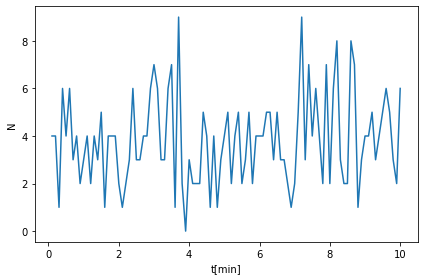

In [14]:
import pandas as pd
import numpy as np
from uncertainties import ufloat, unumpy
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from matplotlib import rcParams
rcParams.update({'figure.autolayout': True})

## 1. del
d1 = pd.read_csv('data1.txt', header=None, sep='\t', decimal=',')
t, cnt = d1[0].values, d1[1].values
avg = round(np.mean(cnt),2)
stp = round(np.sqrt(avg), 2)
std = round(np.std(cnt), 2)

d1.columns='t[min]','N'
plt.plot(t, cnt)
plt.xlabel('t[min]')
plt.ylabel('N')
plt.show()

### 3.2 Meritve s svinčenimi ploščicami
Debelina ene ploščice $d_1 = 2 mm \pm 0.6 mm $


In [22]:
d2 = {}
lines = open('data2.txt', 'r').readlines()
n = 0
for l in lines:
    if l.startswith('n='):
        n = int(l.split('=')[1])
        d2[n] = []
    else:
        s = l.split('\t')
        d2[n].append([float(s[0]), float(s[1])])

avg = []
ozadje = 0
for n in d2.keys():
    df = pd.DataFrame(d2[n])
    n_display = str(n) + ' ploščic'
    if n < 0: n_display = 'ozadje'
    print('Meritve N po minutah za', n_display, ':', str(list(df[1].values)))
    av, st =  np.average(df[1].values), np.std(df[1].values)
    if n < 0:
        ozadje = (av, st, np.sqrt(av))
    else:
        avg.append([n, av, st, np.sqrt(av)])

Meritve N po minutah za 0 ploščic : [30.0, 43.0, 40.0, 46.0, 43.0, 46.0, 40.0, 45.0, 28.0, 31.0]
Meritve N po minutah za 1 ploščic : [33.0, 31.0, 41.0, 30.0, 33.0, 26.0, 42.0, 32.0, 33.0, 24.0]
Meritve N po minutah za 3 ploščic : [27.0, 25.0, 19.0, 27.0, 28.0, 30.0, 40.0, 30.0, 34.0, 21.0]
Meritve N po minutah za 4 ploščic : [29.0, 27.0, 32.0, 36.0, 23.0, 37.0, 37.0, 25.0, 38.0, 32.0]
Meritve N po minutah za 5 ploščic : [29.0, 17.0, 32.0, 28.0, 25.0, 30.0, 30.0, 22.0, 33.0, 22.0]
Meritve N po minutah za 2 ploščic : [33.0, 29.0, 27.0, 28.0, 30.0, 39.0, 25.0, 27.0, 37.0, 35.0]
Meritve N po minutah za ozadje : [16.0, 10.0, 13.0, 11.0, 15.0, 11.0, 12.0, 12.0, 11.0, 9.0]


### 3.3 Meritve časov med posameznimi sunki

In [25]:
values = []
files = ['data31.txt', 'data33.txt', 'data34.txt']
for f in files:
    data = pd.read_csv(f, sep='\t', decimal=',', header=None)
    vals = data[2].values[np.where(data[2].values != ' ')]
    vals = np.array([i.replace(',', '.') for i in vals]).astype(np.float64)
    values.append(vals)
v = np.concatenate(values)
print('Meritve časov med sunki [s]:', v)

Meritve časov med sunki [s]: [1.11040e+01 2.56000e-01 2.84800e+00 4.62360e+01 1.08800e+00 2.70000e+01
 1.35040e+01 2.40000e+00 8.96000e-01 1.44000e+00 7.74400e+00 1.47200e+00
 2.09280e+01 6.84800e+00 6.43200e+00 3.40000e-01 1.03000e+00 2.26000e+00
 5.00000e-02 4.20000e-01 2.30000e+00 6.00000e-01 4.30000e-01 1.29000e+00
 3.58000e+00 4.39000e+00 3.54000e+00 3.79000e+00 7.60000e-01 9.00000e-02
 1.04500e+01 1.50000e-01 1.63000e+00 6.90000e-01 9.80000e-01 1.00000e+00
 2.31000e+00 2.20000e-01 2.97000e+00 4.92000e+00 1.57000e+00 6.00000e-01
 3.50000e-01 4.04000e+00 1.87000e+00 1.62000e+00 2.98000e+00 2.50000e-01
 3.85000e+00 2.10000e-01 2.94000e+00 5.85000e+00 4.40000e-01 2.34000e+00
 1.41808e+02 6.42560e+01 7.60000e+01 1.42588e+02 1.95040e+01 1.56800e+00
 5.58400e+00 5.96800e+00 4.88000e+00 1.64800e+00 4.32000e-01 2.40000e-01
 6.85600e+00]


## 4 REZULTATI

### 4.1 porazdelitev števila izmerjenih sunkov (10 meritev/minuto)

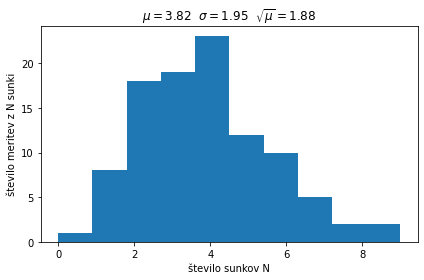

In [15]:
plt.hist(cnt)
plt.xlabel('število sunkov N')
plt.ylabel('število meritev z N sunki')
plt.title(r'$\mu={}\ \ \sigma={} \ \ \sqrt{{\mu}}={}$'.format(avg, stp, std))
plt.show()

### 4.2 Povprečni pretok sunkov v odvisnosti od debeline svinca:

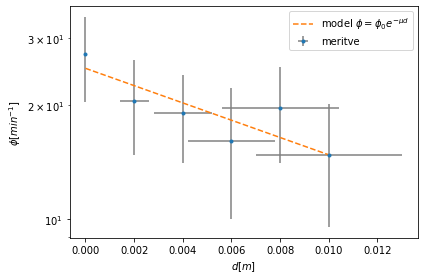

μ(svinca)= 52+/-16 /m


In [27]:

avg = np.array(avg)
ploscica = ufloat(2, 0.6) * 1e-3 # debelina ploščice
d = avg[:, 0] * ploscica
background = ufloat(ozadje[0], ozadje[1]) # sevanje ozadja
phi = unumpy.uarray(avg[:, 1], avg[:, 2]) - background
plt.errorbar(unumpy.nominal_values(d), unumpy.nominal_values(phi),
    xerr=unumpy.std_devs(d), yerr=unumpy.std_devs(phi), ecolor="gray", fmt=".", label='meritve')
plt.yscale('log')
phi_model = lambda x, mu, phi0: phi0 * np.exp(-mu*x)
popt, pcov = curve_fit(phi_model, unumpy.nominal_values(d), unumpy.nominal_values(phi))
_x = np.linspace(min(unumpy.nominal_values(d)), max(unumpy.nominal_values(d)), 1000)
_y = phi_model(_x, popt[0], popt[1])

mu = ufloat(popt[0], np.sqrt(np.diag(pcov))[0])

plt.plot(_x, _y, "--", label=r'model $\phi = \phi_0 e^{-\mu d}$')
plt.xlabel(r'$d [m]$')
plt.ylabel(r'$\phi [min^{-1}]$')
plt.legend()
plt.show()
print('μ(svinca)=',mu,'/m')

### 4.3 Porazdelitev časov med dvema sunkoma
Zaradi težav s shranjevanjem imamo posnetih razmeroma malo sunkov. V nadaljevanju je enaka porazdelitev z generiranimi podatki.

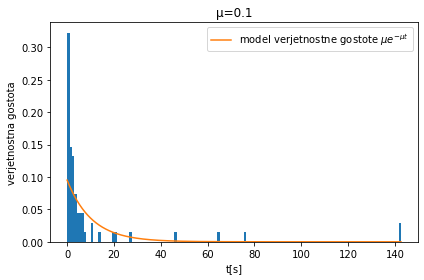

In [34]:
mu1 = 1/np.mean(v)
plt.hist(v, density=True, bins=140)
_x = np.linspace(min(v), max(v), 10000)
_y = mu1 * np.exp(-mu1*_x)
plt.title('μ={} (1 sekunda)'.format(round(mu1, 1)))
plt.ylabel('verjetnostna gostota')
plt.xlabel('t[s]')
plt.plot(_x, _y, label=r'model verjetnostne gostote $\mu e^{-\mu t}$')
plt.legend()
plt.show()

### 4.3 Porazdelitev časa, generirani podatki

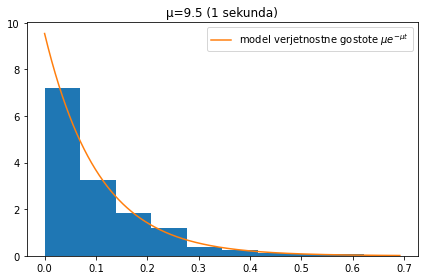

In [36]:
a = pd.read_csv('times.txt')
ts = (a-a.shift(1)).dropna().values.flatten()
mu2 = 1/np.mean(ts)
_x1 = np.linspace(min(ts), max(ts), 10000)
_y1 = mu2 * np.exp(-mu2*_x1)
plt.hist(ts, density=True, bins=10)
plt.title('μ={} (1 sekunda)'.format(round(mu2, 1)))
plt.plot(_x1, _y1, label=r'model verjetnostne gostote $\mu e^{-\mu t}$')
plt.legend()
plt.show()